In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'Lab/Grain-U-Net'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
sys.path.append('/content/drive/MyDrive/{}/src'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME


Mounted at /content/drive
/content/drive/My Drive/Lab/Grain-U-Net


In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Displays the intensity of different sample images

## Aluminum training

### Original image

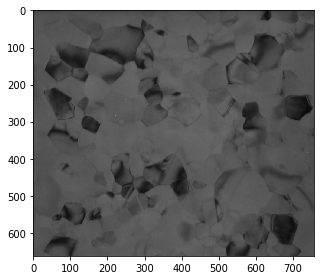

In [3]:
img_path = 'data/hist_analysis/Al_train_2.PNG'

img = io.imread(img_path, as_gray=True)
io.imshow(img)

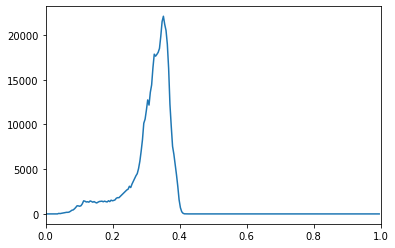

In [4]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
#plt.savefig('Al_train_original_hist.png')
plt.show()

### Normalize

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


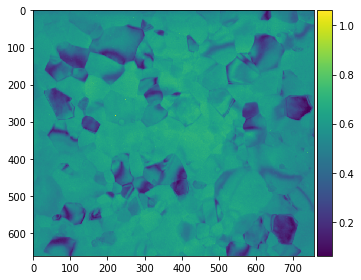

In [5]:
img_normal = img - img.min()
img_normal = img / np.ptp(img)
io.imshow(img_normal)

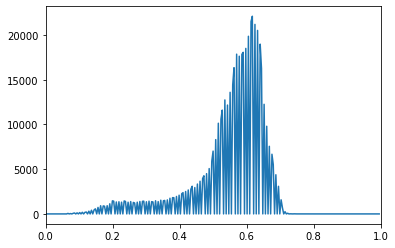

In [6]:
histogram, bin_edges = np.histogram(img_normal, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.savefig('Al_train_normal_hist.png')
plt.show()


## Aluminum as deposited

### Original Image

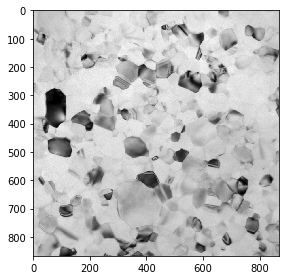

In [ ]:
img_path = 'data/hist_analysis/Al_asdep.PNG'

img = io.imread(img_path, as_gray=True)
io.imshow(img)

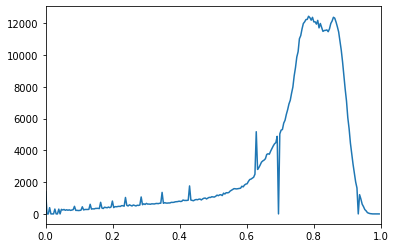

In [ ]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.savefig('Al_asdep_original_hist.png')
plt.show()


### Normalize

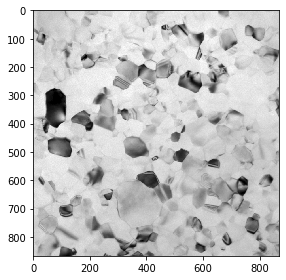

In [ ]:
img_normal = img - img.min()
img_normal = img / np.ptp(img)
io.imshow(img_normal)

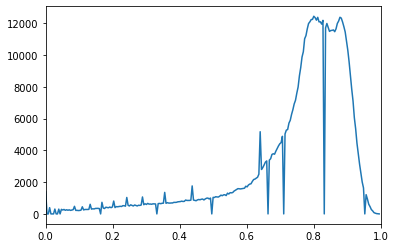

In [ ]:
histogram, bin_edges = np.histogram(img_normal, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.savefig('Al_asdep_normal_hist.png')
plt.show()


## Platinum Axon

### Original Image

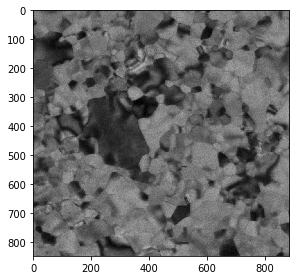

In [ ]:
img_path = 'data/hist_analysis/Pt_Axon.PNG'

img = io.imread(img_path, as_gray=True)
io.imshow(img)

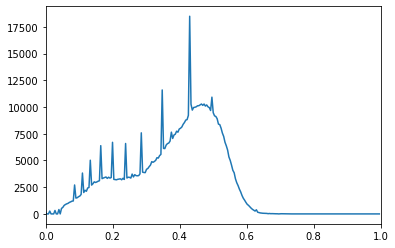

In [ ]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.savefig('Pt_Axon_original_hist.png')
plt.show()


### Normalize

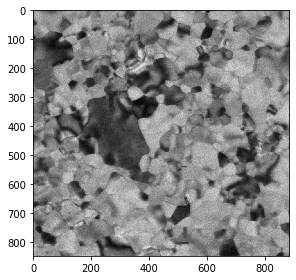

In [ ]:
img_normal = img - img.min()
img_normal = img / np.ptp(img)
io.imshow(img_normal)

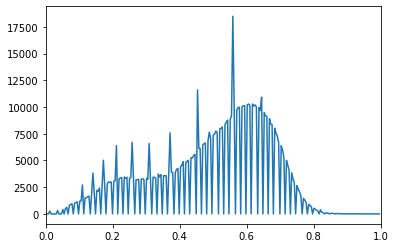

In [ ]:
histogram, bin_edges = np.histogram(img_normal, bins=256, range=(0, 1))

plt.figure()
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.savefig('Pt_Axon_normal_hist.png')
plt.show()


# Histogram matching with AsDep images


In [ ]:
from skimage import io
from skimage.exposure import match_histograms

reference_path = 'data/hist_analysis/Al_train.PNG'   #reference histogram: for us, the al training image
img_path = 'data/hist_analysis/Al_asdep.PNG'   #image to be altered

reference = io.imread(reference_path, as_gray=True)
img = io.imread(img_path, as_gray=True)

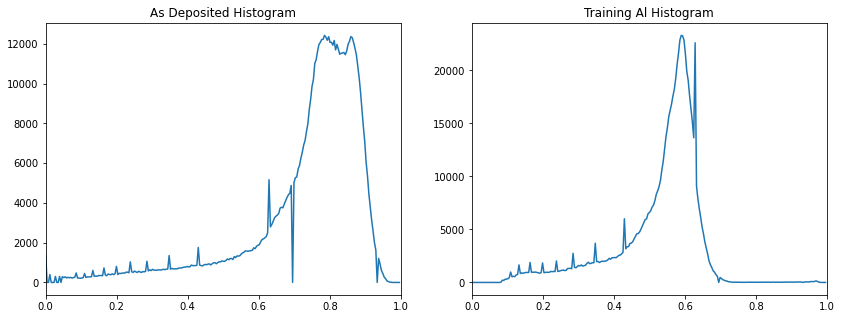

In [ ]:
#printing pre histograms

plt.rcParams['figure.figsize'] = [14, 5]

histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

plt.subplot(1, 2, 1)
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.title('As Deposited Histogram')

histogram, bin_edges = np.histogram(reference, bins=256, range=(0, 1))

plt.subplot(1, 2, 2)
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.title('Training Al Histogram')

plt.show()

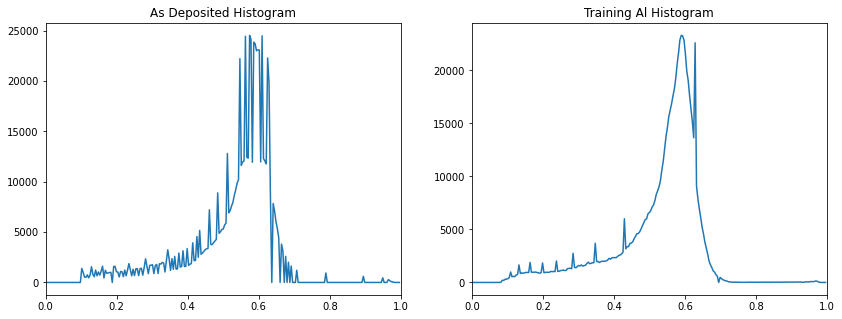

In [ ]:
matched = match_histograms(img, reference)

#printing post histograms

plt.rcParams['figure.figsize'] = [14, 5]

histogram, bin_edges = np.histogram(matched, bins=256, range=(0, 1))

plt.subplot(1, 2, 1)
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.title('As Deposited Histogram')

histogram, bin_edges = np.histogram(reference, bins=256, range=(0, 1))

plt.subplot(1, 2, 2)
plt.xlim([0.0, 1])
plt.plot(bin_edges[0:-1], histogram)
plt.title('Training Al Histogram')

plt.show()

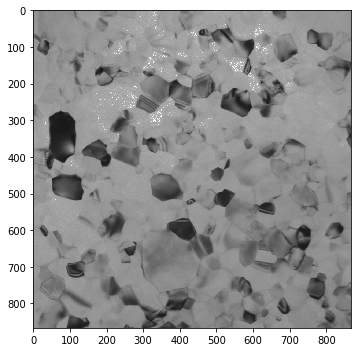

In [ ]:
io.imshow(matched)